# Recommendation

Collaborative filtering is a widely used method in recommender systems for predicting the
interest of a user toward an item by integrating the interest of the other users. In this project
we are asked to implement two collaborative filtering methods, namely, Neighborhood-based
collaborative filtering and Model-based collaborative filtering.
In the neighborhood-based method we identify the similar users (or similar items) to make
prediction about the unrated items by the targeted users. In the model-based method, we train
a machine learning model on the information from the rating matrix to predict the missing
interest rating values.
The dataset we are working with in this project is the “MovieLens” dataset. This data set
provides the rating of the 610 users over 9724 movies.

In [1]:
import numpy as np
import pandas as pd

ratings_file = pd.read_csv('ratings.csv', 
                       names= ['userid', 'movieid', 'rating', 'timestamp'],
                       header=0)
ratings_file.head()

,userid,movieid,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
rating_matrix=ratings_file.pivot_table(index=['userid'], columns=['movieid'], values='rating', fill_value=0).values
print(rating_matrix.shape)

(610, 9724)


In [3]:
x=rating_matrix>0
x=x*1
print(x)
sparcity=(np.sum(x))/(rating_matrix.shape[0]*rating_matrix.shape[1])
print(sparcity)

[[1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
0.016999683055613623


With this sparsity, we can conclude that a small fraction of matrix is nonzero. Therefore,
this matrix is sparse.

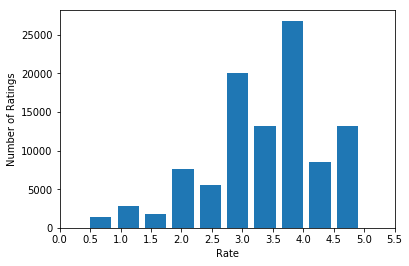

In [4]:
import matplotlib.pyplot as plt

p=ratings_file.iloc[:,2]

plt.hist(p,width=0.35)
plt.xlabel("Rate")
plt.ylabel("Number of Ratings")
x=np.arange(12)
x=x/2
plt.xticks(x)
plt.show()

With this distribution, we can see that users mostly rated movies 3 and above, and a
few ratings are less than 3. Therefore, the distribution is concentrated around 4/5.

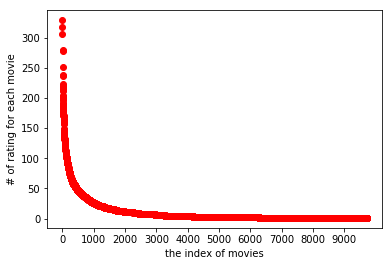

In [5]:
r2=rating_matrix>0
r2=1*r2
n=r2.sum(axis=0)
n2=-1*np.sort(-1*n)

plt.plot(n2,'or')
x=np.arange(10)*1000
plt.xticks(x)
plt.xlabel("the index of movies")
plt.ylabel("# of rating for each movie")
plt.show()

In this distribution, we can see that a small number of movies watched a lot and most of
the movies watched by the small number of users.

(610,)


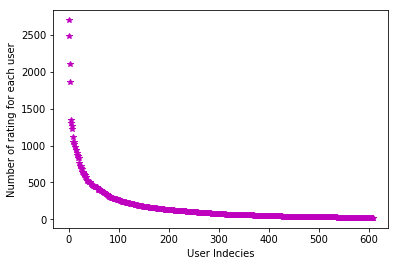

In [6]:
n2=rating_matrix.T>0
n2=n2*1
mm=n2.sum(axis=0)
mm=-1*np.sort(-1*mm)
print(mm.shape)
plt.plot(mm,'*m')
plt.xlabel("User Indecies")
plt.ylabel("Number of rating for each user")
plt.show()

This distribution also is like the previous distribution. It means that a small number of
users rated a lot of movies and most of the users rated a few numbers of movies.

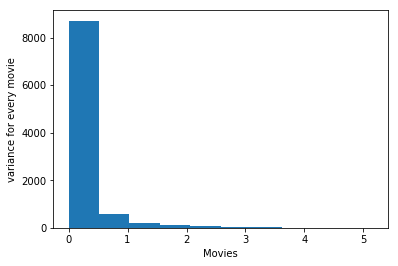

In [7]:
movie_rating_mean_vec = np.mean ( rating_matrix, axis=0)
sqr = (rating_matrix-movie_rating_mean_vec)**2
var = np.mean (sqr, axis=0)

plt.hist(var)
plt.xlabel("Movies")
plt.ylabel("variance for every movie")
plt.show()

Based on the distribution, we can say that most of the movies have variances less than
1.5. So, it means users opinions for movies are mostly close to each other’s (variance is
low).

# Neighborhood-based collaborative filtering

In [8]:
import surprise
from surprise import KNNBasic, KNNWithMeans
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold
from surprise import accuracy

reader = Reader(rating_scale=(1.0, 5.0))
print(reader)
dataset_one = Dataset.load_from_df(ratings_file[['userid', 'movieid', 'rating']], reader)


In [9]:
dataset_one = Dataset.load_from_df(ratings_file[['userid', 'movieid', 'rating']], reader)

ks = np.linspace(2, 100, num=50)
kf = KFold(n_splits=10)
options = {'name': 'pearson_baseline'}
outputs = []

for k in ks:
    algo = KNNWithMeans(k=int(k), sim_options=options)
    outputs.append(cross_validate(algo, dataset_one, measures=['RMSE', 'MAE'], cv=10))


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


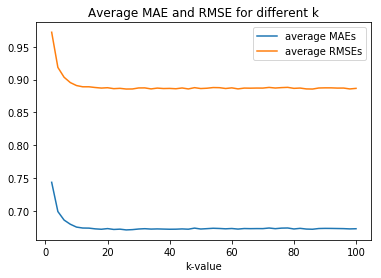

In [42]:
avg_rmses = []
avg_maes = []
for output in outputs:
    avg_rmses.append(np.mean(output['test_rmse']))
    avg_maes.append(np.mean(output['test_mae']))
ax = plt.subplot(111)
plt.title("Average MAE and RMSE for different k")
plt.xlabel("k-value")
ax.plot(ks, avg_maes, label="average MAEs")
ax.plot(ks, avg_rmses, label="average RMSEs")
legend = ax.legend()
plt.show()

In [25]:
a = []
b = []
minimum1=min(avg_rmses)
print('the minimum of average rmses is', minimum1)
for i in avg_rmses:
    if((i<minimum1*1.001) and (i> minimum1*0.999)):
        a.append(avg_rmses.index(i))
        print(avg_rmses.index(i))
t=min(a)  
print('the best k is', t)

minimum2=min(avg_maes)
print('the minimum of average maes is',minimum2)
for i in avg_maes:
    if((i<minimum2*1.001) and (i> minimum2*0.999)):
        b.append(avg_maes.index(i))
        print(avg_maes.index(i))
s=min(b)  
print('the best k is',s)

the minimum of average rmses is 0.8851817911397003
10
14
17
18
19
31
32
35
46
the best k is 10
the minimum of average maes is 0.6710209252402277
10
13
14
17
18
31
35
the best k is 10


In this part, in addition to finding min k, we tried to find all those k s that are in 0.1%
neighborhood of minimum, because the min value is very close to the converge value
that means we may have some oscillation around the min value. Then the best k would
be the smallest one.

In [10]:

def find_Pop_Unpop_HV_Movies(trainset, testset):
    test_pop = []
    test_unpop = []
    test_HV=[]
    check={}
    for k, v in trainset.ir.items():
        check[k] = [r for u, r in v]
    for u,m,r in testset:
        if(int(m) in check):
            check[int(m)].append(r)
        else: 
            check[int(m)]=[];
            check[int(m)].append(r)
    for u,m,r in testset:
        if(len(check[int(m)])>2):
            test_pop.append((u,m,r))
        else:
            test_unpop.append((u,m,r))
        if(np.var(check[int(m)])>=2 and len(check[int(m)])>=5):
            test_HV.append((u,m,r)) 
    return test_pop,test_unpop,test_HV

In [11]:
ks = np.linspace(2, 100, num=50)
options = {'name': 'pearson_baseline'}
outputs = []
reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(ratings_file[['userid', 'movieid', 'rating']], reader)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9694
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9552
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9833
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9733
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9544
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9565
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9612
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8666
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8718
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8811
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8802
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8627
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8684
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8710
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE

Done computing similarity matrix.
RMSE: 0.8678
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8755
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8681
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8670
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8658
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8930
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8793
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8673
Estimating biases using als...
Computing th

RMSE: 0.8803
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8768
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8774
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8661
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8576
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8847
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8655
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8691
Estimating biases using als...
Computing the pearson_baseline similarity matr

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8785
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8734
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8770
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8759
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8643
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8762
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8746
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8557
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8736
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8698
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8802
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8742
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8597
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8712
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE

Done computing similarity matrix.
RMSE: 0.8557
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8649
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8722
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8810
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8757
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8733
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8716
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8601
Estimating biases using als...
Computing th

RMSE: 0.8668
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8765
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8789
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8695
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8619
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8914
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8657
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8583
Estimating biases using als...
Computing the pearson_baseline similarity matr

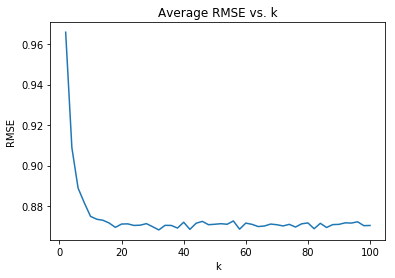

the minimum average RMSE is 0.8681920641408649


In [40]:
kf = KFold(n_splits=10)
avg_rmses_pop = []
for k in ks:
    algo = KNNWithMeans(k=int(k), sim_options=options)
    totalRMSE_pop=0
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        pop,unpop,highvar=find_Pop_Unpop_HV_Movies(trainset, testset)
        predictions_pop = algo.test(pop)
        totalRMSE_pop += accuracy.rmse(predictions_pop)
    avg_rmses_pop.append(totalRMSE_pop / 10.)
 
ax = plt.subplot(111)
plt.title("Average RMSE vs. k")
plt.xlabel("k")
plt.ylabel("RMSE ")
ax.plot(ks, avg_rmses_pop)
plt.show()

print('the minimum average RMSE is', np.min(avg_rmses_pop))

Based on the graph, we can conclude that neighborhood-based collaborative filtering
works well in popular set, because this algorithm works based on finding similarity 
between users. So we have more information in popular set to predict properly. 

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9910
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9828
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9879
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9774
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0076
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0114
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9968
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9330
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0093
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9638
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9976
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9549
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0218
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9542
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE

Done computing similarity matrix.
RMSE: 0.9835
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9931
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9791
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9411
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9482
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9613
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0142
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9793
Estimating biases using als...
Computing th

RMSE: 0.9818
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9684
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9661
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9668
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0264
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9997
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9725
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9377
Estimating biases using als...
Computing the pearson_baseline similarity matr

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9936
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9677
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9856
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9980
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0015
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9857
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9643
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9722
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0125
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0057
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9231
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9698
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9526
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9613
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE

Done computing similarity matrix.
RMSE: 0.9770
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9734
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0122
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9395
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9476
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9979
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9745
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9670
Estimating biases using als...
Computing th

RMSE: 0.9646
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0024
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9624
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9556
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9555
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9839
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0182
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9622
Estimating biases using als...
Computing the pearson_baseline similarity matr

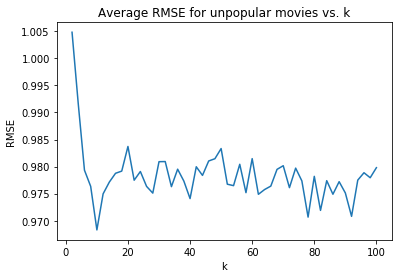

the minimum average RMSE is 0.9682968446837409


In [41]:
avg_rmses_unpop = []
for k in ks:
    algo = KNNWithMeans(k=int(k), sim_options=options)
    totalRMSE_unpop=0
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        pop,unpop,highvar=find_Pop_Unpop_HV_Movies(trainset, testset)
        predictions_unpop = algo.test(unpop)
        totalRMSE_unpop += accuracy.rmse(predictions_unpop)
    avg_rmses_unpop.append(totalRMSE_unpop / 10.)
 
ax = plt.subplot(111)
plt.title("Average RMSE for unpopular movies vs. k")
plt.xlabel("k")
plt.ylabel("RMSE ")
ax.plot(ks, avg_rmses_unpop)
plt.show()

print('the minimum average RMSE is', np.min(avg_rmses_unpop))

With the same argument, our neighborhood-based prediction for unpopular set is not
good in comparison with the popular set, because unpopular movies tend to have
different rating among users. In the following, we can see the graph that shows this high
variance behavior

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2879
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1759
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2699
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4534
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2374
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1085
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4211
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1984
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2546
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0595
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1467
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2215
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3029
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1813
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE

Done computing similarity matrix.
RMSE: 1.1785
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4840
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1523
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1478
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2399
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2665
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2564
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0024
Estimating biases using als...
Computing th

RMSE: 1.3083
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2362
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2567
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2698
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3265
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3150
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0367
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2079
Estimating biases using als...
Computing the pearson_baseline similarity matr

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3013
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1295
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4825
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3964
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3430
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3274
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1549
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE

Done computing similarity matrix.
RMSE: 1.1463
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1831
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3147
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0428
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0463
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1831
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1596
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3258
Estimating biases using als...
Computing th

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1288
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2052
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0872
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1599
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1533
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1522
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2924
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE

Done computing similarity matrix.
RMSE: 1.3643
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1306
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2061
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4485
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.2382
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3592
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1726
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1828
Estimating biases using als...
Computing th

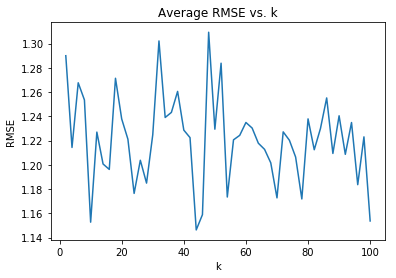

the minimum average RMSE is 1.1463146180465358


In [43]:
avg_rmses_HV = []
for k in ks:
    algo = KNNWithMeans(k=int(k), sim_options=options)
    totalRMSE_HV=0
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        pop,unpop,HV=find_Pop_Unpop_HV_Movies(trainset, testset)
        predictions_HV = algo.test(HV)
        totalRMSE_HV += accuracy.rmse(predictions_HV)
    avg_rmses_HV.append(totalRMSE_HV / 10.)
 
ax = plt.subplot(111)
plt.title("Average RMSE vs. k")
plt.xlabel("k")
plt.ylabel("RMSE ")
ax.plot(ks, avg_rmses_HV)
plt.show()

print('the minimum average RMSE is', np.min(avg_rmses_HV))

Here, we have much worse situation. We selected high variances movies. So, we
expected to see a worse average RMSE. This is expected, because we know that high
variances movies have higher variances in rating, so it is very difficult to make a
reasonable prediction due to the high level of randomness in the data. In the following,
we can see the result.

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


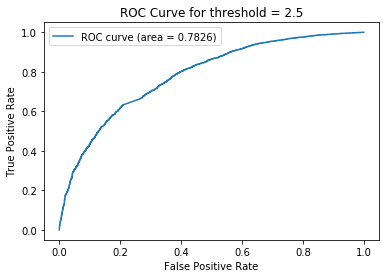

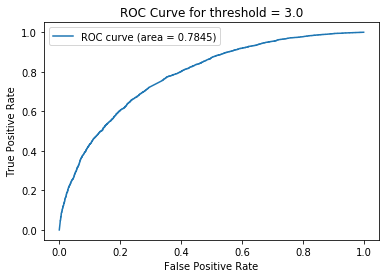

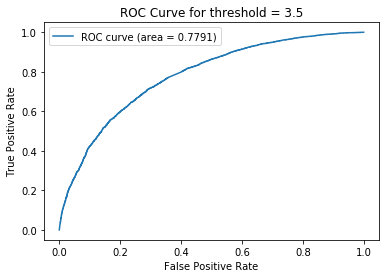

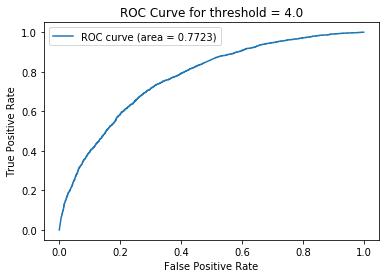

In [46]:
from sklearn import metrics
threshold = [2.5,3,3.5,4]
k = t
optiones={'name': 'pearson_baseline'}
kf = KFold(n_splits=10)
algo = KNNWithMeans(k=t, sim_options=optiones)

traint1=[]
for train, test in kf.split(data):
    algo.fit(train)
    pred = algo.test(test)
    break
    
    
for th in threshold:
    y=[]
    pred_y=[]
    for u, i, r, est, details in pred:
        pred_y.append(est)
        y.append(th<r)
    fpr, tpr, _ = metrics.roc_curve(y_true=y, y_score=pred_y, pos_label=1)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % metrics.roc_auc_score(y_true=y, y_score=pred_y))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold = %.1f' % th)
    plt.legend()
    plt.show()

We can evaluate the performance of prediction by comparing areas under the curve
(AUC) for different ROC curves. Larger AUC means that the recommendation are more
relevant and the performance is better. As we can see in the table, we have the highest
AUC with threshold=3.
In total, the area for different thresholds are around 0.77-0.78 that turns out the
performance of neighborhood-based models is not quite good.

# Model-based collaborative filtering

This part is devoted to model-based collaborative filtering. The approach we chose here is to
approximate the rating matrix with a low-rank matrix that plays the role of the latent factors of
the rating process. Then we approximate the unrated entries of the original rating matrix from
the latent factors. The low rank matrix can be calculated by non-negative matrix factorization.

In [10]:
from surprise.prediction_algorithms import matrix_factorization
from tqdm import tqdm_notebook
from sklearn import metrics
from surprise.model_selection import train_test_split

In [39]:
k_range = range(2,50,2)
avg_rmse = []
avg_maes = []
kf = KFold(n_splits=10)
for k in tqdm_notebook(k_range):
    algo = matrix_factorization.NMF(n_factors = int(k))
    k_rmse = []
    k_maes = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        predictions = algo.test(testset)
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
        k_maes.append(accuracy.mae(predictions, verbose=False))
    avg_rmse.append(np.mean(k_rmse))
    avg_maes.append(np.mean(k_maes))
 


Exception ignored in: <function tqdm.__del__ at 0x7f4cd58152f0>
Traceback (most recent call last):
  File "/home/girs/anaconda3/lib/python3.7/site-packages/tqdm/_tqdm.py", line 889, in __del__
    self.close()
  File "/home/girs/anaconda3/lib/python3.7/site-packages/tqdm/_tqdm.py", line 1095, in close
    self._decr_instances(self)
  File "/home/girs/anaconda3/lib/python3.7/site-packages/tqdm/_tqdm.py", line 454, in _decr_instances
    cls.monitor.exit()
  File "/home/girs/anaconda3/lib/python3.7/site-packages/tqdm/_monitor.py", line 52, in exit
    self.join()
  File "/home/girs/anaconda3/lib/python3.7/threading.py", line 1029, in join
    raise RuntimeError("cannot join current thread")
RuntimeError: cannot join current thread


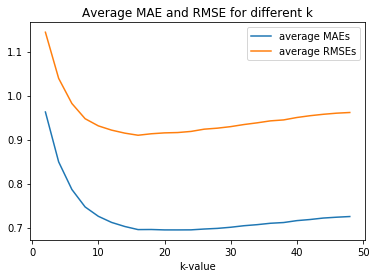

In [40]:
ax = plt.subplot(111)
plt.title("Average MAE and RMSE for different k")
plt.xlabel("k-value")
ax.plot(k_range, avg_maes, label="average MAEs")
ax.plot(k_range, avg_rmse, label="average RMSEs")
legend = ax.legend()
plt.show()

The minimum value of RMSE is 0.9120 and the minimum value for MAE is 0.6930. Both
RMSE and MAE minimum values correspond to k=20 which is the number of movie
genres in the MovieLens dataset

In [27]:
print('The minimum average RMSE is %f for k = %d' %(np.min(avg_rmse),k_range[np.argmin(avg_rmse)]))
print('The minimum average MAE is %f for k = %d' %(np.min(avg_maes),k_range[np.argmin(avg_maes)]))

The minimum average RMSE is 0.912009 for k = 20
The minimum average MAE is 0.693027 for k = 20


100%|██████████| 24/24 [18:07<00:00, 61.10s/it]


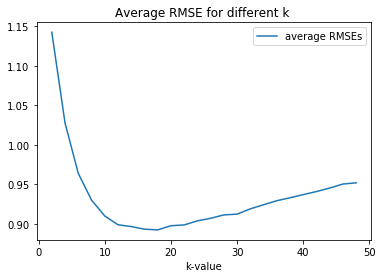

The minimum average RMSE is 0.892233 for k = 18


In [11]:
k_range = range(2,50,2)
avg_rmse = []
kf = KFold(n_splits=10)
for k in tqdm(k_range):
    algo = matrix_factorization.NMF(n_factors = int(k))
    k_rmse = []
    k_maes = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        pop,unpop,HV=find_Pop_Unpop_HV_Movies(trainset, testset)
        predictions = algo.test(pop)
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse.append(np.mean(k_rmse))
 
ax = plt.subplot(111)
plt.title("Average RMSE for different k ")
plt.xlabel("k-value")
ax.plot(k_range, avg_rmse, label="average RMSEs")
legend = ax.legend()
plt.show()

print('The minimum average RMSE is %f for k = %d' %(np.min(avg_rmse),k_range[np.argmin(avg_rmse)]))

The minimum RMSE value in the popular trimmed test set is 0.8922 which correspond
to k = 18 for RMSE. The minimum RMSE for the popular movies are smaller than the
whole dataset. This means that the NNMF performs better on the popular test set, as
expected. Because popular dataset has much less variance and contains only the movies
that we have more information about, thus provides us more predictability. 

100%|██████████| 24/24 [17:56<00:00, 60.79s/it]


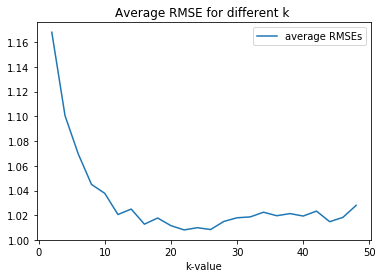

The minimum average RMSE is 1.008162 for k = 22


In [12]:
k_range = range(2,50,2)
avg_rmse = []
kf = KFold(n_splits=10)
for k in tqdm(k_range):
    algo = matrix_factorization.NMF(n_factors = int(k))
    k_rmse = []
    k_maes = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        pop,unpop,HV=find_Pop_Unpop_HV_Movies(trainset, testset)
        predictions = algo.test(unpop)
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse.append(np.mean(k_rmse))
 
ax = plt.subplot(111)
plt.title("Average RMSE for different k ")
plt.xlabel("k-value")
ax.plot(k_range, avg_rmse, label="average RMSEs")
legend = ax.legend()
plt.show()

print('The minimum average RMSE is %f for k = %d' %(np.min(avg_rmse),k_range[np.argmin(avg_rmse)]))

The minimum RMSE value in the popular trimmed test set is 1.0081 which correspond
to k = 22 for RMSE.
The minimum RMSE increased comparing to the popular test set. This behavior was
expected because in the unpopular dataset we have few ratings for each movie that
causes high variance in the rating samples of each movie. 

100%|██████████| 24/24 [17:55<00:00, 60.64s/it]


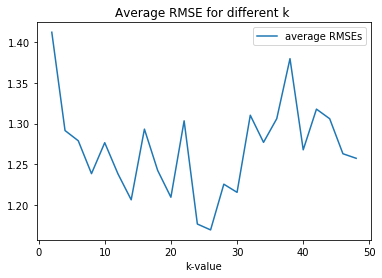

The minimum average RMSE is 1.169701 for k = 26


In [13]:
k_range = range(2,50,2)
avg_rmse = []
kf = KFold(n_splits=10)
for k in tqdm(k_range):
    algo = matrix_factorization.NMF(n_factors = int(k))
    k_rmse = []
    k_maes = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        pop,unpop,HV=find_Pop_Unpop_HV_Movies(trainset, testset)
        predictions = algo.test(HV)
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse.append(np.mean(k_rmse))
 
ax = plt.subplot(111)
plt.title("Average RMSE for different k ")
plt.xlabel("k-value")
ax.plot(k_range, avg_rmse, label="average RMSEs")
legend = ax.legend()
plt.show()

print('The minimum average RMSE is %f for k = %d' %(np.min(avg_rmse),k_range[np.argmin(avg_rmse)]))

The minimum RMSE value in the popular trimmed test set is 1.1697 which correspond
to k = 26 for RMSE. As expected, the performance is even worse in the high variance test
set.

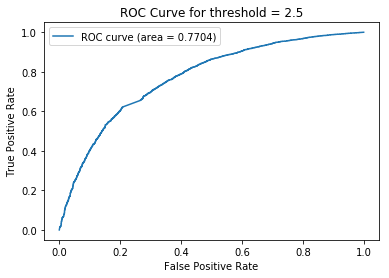

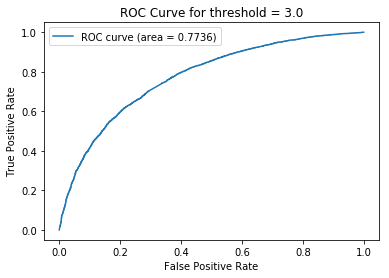

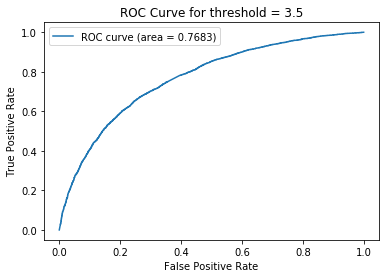

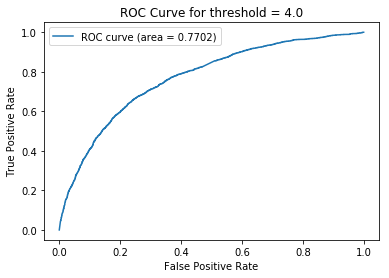

In [11]:


threshold = [2.5,3,3.5,4]
algo = matrix_factorization.NMF(n_factors = 20)
train, test = train_test_split(dataset_one, test_size=0.1, random_state=0)

algo.fit(train)
pred = algo.test(test)

    
for th in threshold:
    y=[]
    pred_y=[]
    for u, i, r, est, details in pred:
        pred_y.append(est)
        y.append(th<r)
    fpr, tpr, _ = metrics.roc_curve(y_true=y, y_score=pred_y, pos_label=1)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % metrics.roc_auc_score(y_true=y, y_score=pred_y))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold = %.1f' % th)
    plt.legend()
    plt.show()

We can evaluate the performance of prediction by comparing areas under the curve
(AUC) for different ROC curves. Larger AUC means that the recommendations are more
relevant and the performance is better. As we can see in the table, we have the highest
AUC with threshold=3. This observation is consistent between the KNN collaborating
filtering and NNMF-based collaborative filtering.
In total, the area for different thresholds are around 0.76-0.76 Which means the
performance of the NNMF model is almost as good as KNN (both are not good enough).
We knew from the lectures that the advantage of the NNMF model is not better
performance, rather it’s interpretability. Therefore, we didn’t expect much better
performance. 

# Matrix factorization with bias

In [117]:
algo = matrix_factorization.NMF(n_factors = 20)
train, test = train_test_split(dataset_one, test_size=0.01, random_state=0)
algo.fit(train)

In [118]:
movies_df = pd.read_csv ("movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [119]:
U = algo.pu
V = algo.qi
print (V.shape)
print (U.shape)
V_df = pd.DataFrame(V)
U_df = pd.DataFrame(U)
for i in range (V.shape[1]):
    B = V_df.sort_values(i,ascending=False)[0:10]
    movies_index  = np.array(B.index)
    print ("column",i)
    print (movies_df.iloc[movies_index]["genres"])
    print ("="*40)

(9689, 20)
(610, 20)
column 0
5371        Horror|Mystery|Thriller
6997    Action|Crime|Drama|Thriller
2136                 Comedy|Romance
4307                         Comedy
4935          Action|Drama|Thriller
2877                         Comedy
2214                  Drama|Romance
1213                         Comedy
2207                          Drama
7732                    Documentary
Name: genres, dtype: object
column 1
225                                      Drama
6086                     Adventure|Crime|Drama
4650                     Comedy|Mystery|Sci-Fi
1715                                     Drama
1264                                    Comedy
6708                                     Drama
16                               Drama|Romance
5797            Action|Fantasy|Horror|Thriller
2043             Action|Horror|Sci-Fi|Thriller
3713    Drama|Fantasy|Mystery|Romance|Thriller
Name: genres, dtype: object
column 2
6997    Action|Crime|Drama|Thriller
6496           Comedy|Drama|Ro

In [11]:
from surprise.prediction_algorithms import matrix_factorization
from tqdm import tqdm_notebook
from sklearn import metrics
from surprise.model_selection import train_test_split

In [19]:
k_range = range(2,50,2)
avg_rmse = []
avg_maes = []
kf = KFold(n_splits=10)
for k in tqdm_notebook(k_range):
    algo = matrix_factorization.SVD(n_factors = int(k),biased=True)
    k_rmse = []
    k_maes = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        predictions = algo.test(testset)
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
        k_maes.append(accuracy.mae(predictions, verbose=False))
    avg_rmse.append(np.mean(k_rmse))
    avg_maes.append(np.mean(k_maes))
 

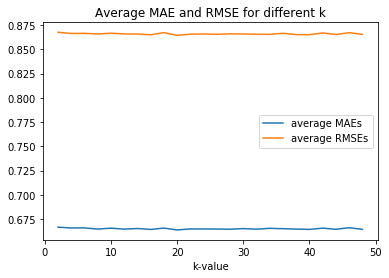

In [20]:
ax = plt.subplot(111)
plt.title("Average MAE and RMSE for different k")
plt.xlabel("k-value")
ax.plot(k_range, avg_maes, label="average MAEs")
ax.plot(k_range, avg_rmse, label="average RMSEs")
legend = ax.legend()
plt.show()

We observe that unlike NNMF and KNN, the RMSE and MAE plots of the MF with bias is
very smooth with very small variations with respect to number of latent factors. 

In [21]:
print('The minimum average RMSE is %f for k = %d' %(np.min(avg_rmse),k_range[np.argmin(avg_rmse)]))
print('The minimum average MAE is %f for k = %d' %(np.min(avg_maes),k_range[np.argmin(avg_maes)]))

The minimum average RMSE is 0.864399 for k = 20
The minimum average MAE is 0.663760 for k = 20


The minimum value of RMSE and MAE for the NNMF with bias terms happens when the
number of factors is 20, and the associated RMSE and MAE values are 0.8643 and
0.6637 respectively.

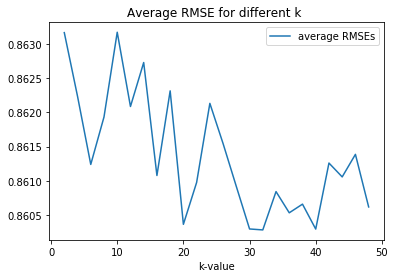

The minimum average RMSE is 0.860285 for k = 32


In [22]:
k_range = range(2,50,2)
avg_rmse = []
kf = KFold(n_splits=10)
for k in tqdm_notebook(k_range):
    algo = matrix_factorization.SVD(n_factors = int(k),biased=True)
    k_rmse = []
    k_maes = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        pop,unpop,HV=find_Pop_Unpop_HV_Movies(trainset, testset)
        predictions = algo.test(pop)
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse.append(np.mean(k_rmse))
 
ax = plt.subplot(111)
plt.title("Average RMSE for different k ")
plt.xlabel("k-value")
ax.plot(k_range, avg_rmse, label="average RMSEs")
legend = ax.legend()
plt.show()

print('The minimum average RMSE is %f for k = %d' %(np.min(avg_rmse),k_range[np.argmin(avg_rmse)]))

The minimum value of RMSE in of the NNMF algorithm with bias on the unpopular
dataset is equal to 0.8877 which is accrued when k=26.

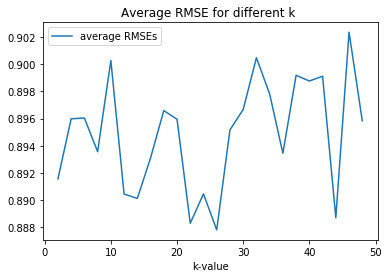

The minimum average RMSE is 0.887798 for k = 26


In [23]:
k_range = range(2,50,2)
avg_rmse = []
kf = KFold(n_splits=10)
for k in tqdm_notebook(k_range):
    algo = matrix_factorization.SVD(n_factors = int(k),biased=True)
    k_rmse = []
    k_maes = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        pop,unpop,HV=find_Pop_Unpop_HV_Movies(trainset, testset)
        predictions = algo.test(unpop)
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse.append(np.mean(k_rmse))
 
ax = plt.subplot(111)
plt.title("Average RMSE for different k ")
plt.xlabel("k-value")
ax.plot(k_range, avg_rmse, label="average RMSEs")
legend = ax.legend()
plt.show()

print('The minimum average RMSE is %f for k = %d' %(np.min(avg_rmse),k_range[np.argmin(avg_rmse)]))

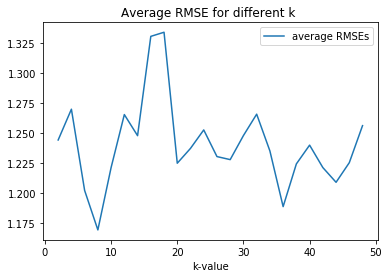

The minimum average RMSE is 1.168996 for k = 8


In [24]:
k_range = range(2,50,2)
avg_rmse = []
kf = KFold(n_splits=10)
for k in tqdm_notebook(k_range):
    algo = matrix_factorization.SVD(n_factors = int(k),biased=True)
    k_rmse = []
    k_maes = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        pop,unpop,HV=find_Pop_Unpop_HV_Movies(trainset, testset)
        predictions = algo.test(HV)
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
    avg_rmse.append(np.mean(k_rmse))
 
ax = plt.subplot(111)
plt.title("Average RMSE for different k ")
plt.xlabel("k-value")
ax.plot(k_range, avg_rmse, label="average RMSEs")
legend = ax.legend()
plt.show()

print('The minimum average RMSE is %f for k = %d' %(np.min(avg_rmse),k_range[np.argmin(avg_rmse)]))

The minimum value of RMSE in of the NNMF algorithm with bias on the high variance
dataset is equal to 1.16 which is accrued when k=8.


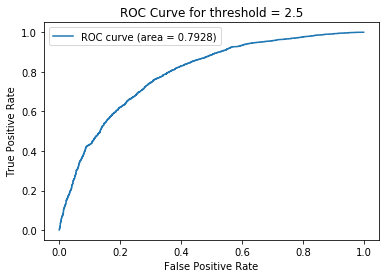

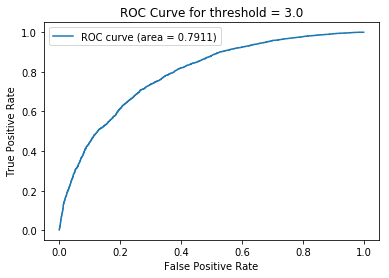

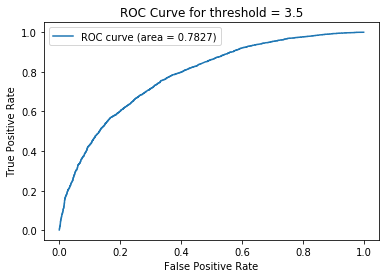

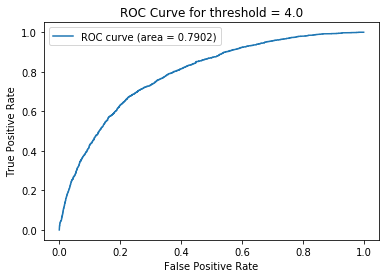

In [122]:
threshold = [2.5,3,3.5,4]
algo = matrix_factorization.SVD(n_factors = 20,biased=True)
train, test = train_test_split(dataset_one, test_size=0.1, random_state=0)

algo.fit(train)
pred = algo.test(test)

    
for th in threshold:
    y=[]
    pred_y=[]
    for u, i, r, est, details in pred:
        pred_y.append(est)
        y.append(th<r)
    fpr, tpr, _ = metrics.roc_curve(y_true=y, y_score=pred_y, pos_label=1)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % metrics.roc_auc_score(y_true=y, y_score=pred_y))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold = %.1f' % th)
    plt.legend()
    plt.show()

We can evaluate the performance of prediction by comparing areas under the curve
(AUC) for different ROC curves. Larger AUC means that the recommendations are more
relevant and the performance is better. As we can see in the table, we have the highest
AUC with threshold=2.5.
In total, the area for different thresholds are around 0.78-0.79 Which means the
performance of the NNMF model is a bit better than NNMF and KNN. 

# Compare all the result

In [121]:
from sklearn.metrics import mean_squared_error

dataset_one = Dataset.load_from_df(ratings_file[['userid', 'movieid', 'rating']], reader)
print (dataset_one.df.head())
user_rating_mean = dataset_one.df.groupby(['userid'])['rating'].mean().tolist()
print (np.size(user_rating_mean))
def naive_mean_prediction(dataset):
    predictions = [user_rating_mean[dataset[i][0]-1] for i in range(len(dataset))]
    return predictions

   userid  movieid  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0
610


In [24]:
k_rmse = []
kf = KFold(n_splits=10)
for trainset, testset in kf.split(dataset_one):
    label = [testset[i][2] for i in range(len(testset))]
    predictions = naive_mean_prediction(testset)
    k_rmse.append(mean_squared_error(label,predictions))
avg_rmse= np.mean(k_rmse)
print('the average RMSE across all 10 folds by naive collaborative filter is %0.4f'%avg_rmse)

   userid  movieid  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0
the average RMSE across all 10 folds by naive collaborative filter is 0.8737


In [25]:
k_rmse = []
kf = KFold(n_splits=10)
for trainset, testset in kf.split(dataset_one):
    pop,unpop,HV=find_Pop_Unpop_HV_Movies(trainset, testset)
    testset = pop
    label = [testset[i][2] for i in range(len(testset))]
    predictions = naive_mean_prediction(testset)
    k_rmse.append(mean_squared_error(label,predictions))
avg_rmse= np.mean(k_rmse)
print('the average RMSE across all 10 folds by naive collaborative filter is %0.4f'%avg_rmse)

the average RMSE across all 10 folds by naive collaborative filter is 0.8766


In [26]:
k_rmse = []
kf = KFold(n_splits=10)
for trainset, testset in kf.split(dataset_one):
    pop,unpop,HV=find_Pop_Unpop_HV_Movies(trainset, testset)
    testset = unpop
    label = [testset[i][2] for i in range(len(testset))]
    predictions = naive_mean_prediction(testset)
    k_rmse.append(mean_squared_error(label,predictions))
avg_rmse= np.mean(k_rmse)
print('the average RMSE across all 10 folds by naive collaborative filter is %0.4f'%avg_rmse)

the average RMSE across all 10 folds by naive collaborative filter is 0.8499


In [27]:
k_rmse = []
kf = KFold(n_splits=10)
for trainset, testset in kf.split(dataset_one):
    pop,unpop,HV=find_Pop_Unpop_HV_Movies(trainset, testset)
    testset = HV
    label = [testset[i][2] for i in range(len(testset))]
    predictions = naive_mean_prediction(testset)
    k_rmse.append(mean_squared_error(label,predictions))
avg_rmse= np.mean(k_rmse)
print('the average RMSE across all 10 folds by naive collaborative filter is %0.4f'%avg_rmse)

the average RMSE across all 10 folds by naive collaborative filter is 1.7697


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


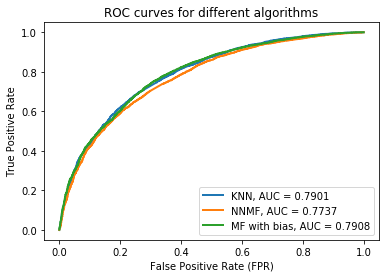

In [12]:
from sklearn.metrics import roc_curve, auc

threshold = [3]
optiones={'name': 'pearson_baseline'}
algo1 = KNNWithMeans(k=20, sim_options=optiones)
algo2 = matrix_factorization.NMF(n_factors = 20)
algo3 = matrix_factorization.SVD(n_factors = 20, biased=True)
train, test = train_test_split(dataset_one, test_size=0.1, random_state=0)

algo1.fit(train)
pred1 = algo1.test(test)

algo2.fit(train)
pred2 = algo2.test(test)

algo3.fit(train)
pred3 = algo3.test(test)

algo_fpr = []
algo_tpr = []
algo_auc = []

for pred in [pred1,pred2,pred3]:
    th = 3    
    y=[]
    pred_y=[]
    for u, i, r, est, details in pred:
        pred_y.append(est)
        y.append(th<r)
    fpr, tpr, _ = metrics.roc_curve(y_true=y, y_score=pred_y, pos_label=1)
    algo_fpr.append (fpr)
    algo_tpr.append (tpr)
    algo_auc.append (auc(fpr, tpr))
    
    
    
    
plt.plot(algo_fpr[0], algo_tpr[0], lw=2, label='KNN, AUC = %0.4f' %algo_auc[0])
plt.plot(algo_fpr[1], algo_tpr[1], lw=2, label='NNMF, AUC = %0.4f' %algo_auc[1])
plt.plot(algo_fpr[2], algo_tpr[2], lw=2, label='MF with bias, AUC = %0.4f' %algo_auc[2])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate')
plt.legend(loc ='lower right')
plt.title('ROC curves for different algorithms')
plt.show()   


The area under the ROC curve is a good metric for evaluating the performance of the
models. As we can see from Figure 20, all three models perform very closely, and the
AUC values are jus slightly different. We can also observe that the MF with bias ROC
curve is standing above the other two models and it has higher value of AUC. Therefore,
we can conclude that among these three models, the MF with bias is performing better
than the others.

In [99]:
def precision_recall (predictions, t=10, threshold=3):
    
    ## turn the predictions into a DataFrame
    user_est_true = pd.DataFrame (columns = ["uid", "mid", "est","true"])
    for uid, iid, r_ui, est, _ in predictions:
        user_est_true = user_est_true.append({"uid":uid,
                                              "mid":iid,
                                              "est":est,
                                              "true":r_ui}
                                             ,ignore_index=True)
    ## get the s(t) and g lists for each user
    user_st_g = pd.DataFrame (columns = ["uid","st","g"])
    for uid in np.unique(user_est_true["uid"]):
        one_user_df = user_est_true[user_est_true.iloc[:,0] == uid ]
        one_user_df = one_user_df.sort_values("est",ascending=False)
        user_st_g = user_st_g.append ( {"uid": uid ,
                                        "st": one_user_df["mid"][0:t] ,
                                       "g":one_user_df[one_user_df.iloc[:,3] > treshhold]["mid"]
                                                      }, ignore_index=True)                                        
    ## calculate precision and recall
    user_pre_rec = pd.DataFrame (columns = ["uid","pre","rec"])
    for i in np.arange (len(user_st_g)) :
         #check for users without anyrating
        if np.size (user_st_g.g[i]) == 0:
            continue
        st_and_g = list (set(user_st_g.st[i]) & set(user_st_g.g[i]))
        precision = np.size (st_and_g) / np.size (user_st_g.st[i])
        recall = np.size (st_and_g) / np.size (user_st_g.g[i])
        user_pre_rec = user_pre_rec.append ({"uid":uid,
                                            "pre": precision,
                                            "rec": recall},
                                           ignore_index=True)
        
    precision = np.average (user_pre_rec["pre"])
    recall = np.average (user_pre_rec["rec"])
    return precision, recall


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

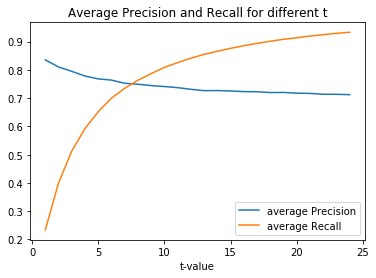

In [100]:
dataset_one = Dataset.load_from_df(ratings_file[['userid', 'movieid', 'rating']], reader)
threshold = 3
kf = KFold(n_splits=10)
options = {'name': 'pearson_baseline'}
algo = KNNWithMeans(k=20, sim_options=options)

t_range = range(1,25,1)
t_pre = []
t_rec = []
for t in t_range:
    k_pre = []
    k_rec = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        predictions = algo.test(testset) # predictions is a list
        precision, recall = precision_recall (predictions, t, threshold)
        k_pre.append(precision)
        k_rec.append(recall)
        
    t_pre.append(np.average(k_pre))
    t_rec.append(np.average(k_rec))

ax = plt.subplot(111)
plt.title("Average Precision and Recall for different t")
plt.xlabel("t-value")
ax.plot(t_range, t_pre, label="average Precision")
ax.plot(t_range, t_rec, label="average Recall")
legend = ax.legend()
plt.show()

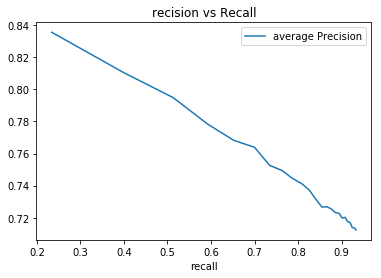

In [101]:
ax = plt.subplot(111)
plt.title("recision vs Recall")
plt.xlabel("recall")
ax.plot(t_rec, t_pre, label="average Precision")
legend = ax.legend()
plt.show()

In [102]:
d = {"t":t_range, "knn_pre": t_pre, "knn_rec":t_rec}
results = pd.DataFrame (data=d)

In [108]:
# saving the results
import os
outname = 'knn_result.csv'
outdir = './dir'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    
results.to_csv(fullname)

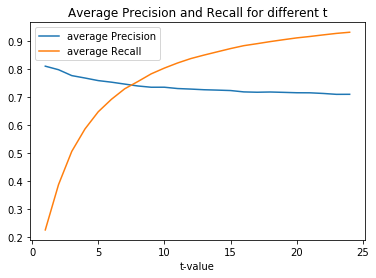

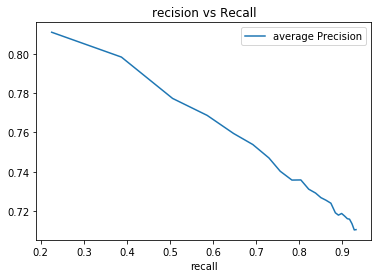

In [111]:
from surprise.prediction_algorithms import matrix_factorization
from tqdm import tqdm_notebook
from sklearn import metrics
from surprise.model_selection import train_test_split

dataset_one = Dataset.load_from_df(ratings_file[['userid', 'movieid', 'rating']], reader)
threshold = 3
kf = KFold(n_splits=10)
algo = matrix_factorization.NMF(n_factors = 20)

t_range = range(1,25,1)
t_pre = []
t_rec = []
for t in tqdm_notebook (t_range) :
    k_pre = []
    k_rec = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        predictions = algo.test(testset) # predictions is a list
        precision, recall = precision_recall (predictions, t, threshold)
        k_pre.append(precision)
        k_rec.append(recall)
        
    t_pre.append(np.average(k_pre))
    t_rec.append(np.average(k_rec))

ax = plt.subplot(111)
plt.title("Average Precision and Recall for different t")
plt.xlabel("t-value")
ax.plot(t_range, t_pre, label="average Precision")
ax.plot(t_range, t_rec, label="average Recall")
legend = ax.legend()
plt.show()

ax = plt.subplot(111)
plt.title("recision vs Recall")
plt.xlabel("recall")
ax.plot(t_rec, t_pre, label="average Precision")
legend = ax.legend()
plt.show()

In [112]:
# saving the results

d = {"t":t_range, "NMF_pre": t_pre, "NMF_rec":t_rec}
results = pd.DataFrame (data=d)
import os
outname = 'NMF_result.csv'
outdir = './dir'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    
results.to_csv(fullname)

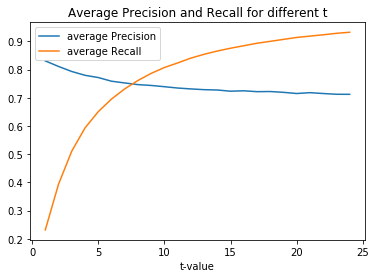

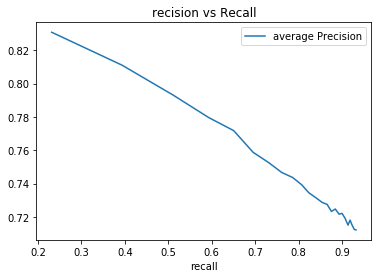

In [113]:
from surprise.prediction_algorithms import matrix_factorization
from tqdm import tqdm_notebook
from sklearn import metrics
from surprise.model_selection import train_test_split

dataset_one = Dataset.load_from_df(ratings_file[['userid', 'movieid', 'rating']], reader)
threshold = 3
kf = KFold(n_splits=10)
algo = algo = matrix_factorization.SVD(n_factors = 20,biased=True)

t_range = range(1,25,1)
t_pre = []
t_rec = []
for t in tqdm_notebook (t_range) :
    k_pre = []
    k_rec = []
    for trainset, testset in kf.split(dataset_one):
        algo.fit(trainset)
        predictions = algo.test(testset) # predictions is a list
        precision, recall = precision_recall (predictions, t, threshold)
        k_pre.append(precision)
        k_rec.append(recall)
        
    t_pre.append(np.average(k_pre))
    t_rec.append(np.average(k_rec))

ax = plt.subplot(111)
plt.title("Average Precision and Recall for different t")
plt.xlabel("t-value")
ax.plot(t_range, t_pre, label="average Precision")
ax.plot(t_range, t_rec, label="average Recall")
legend = ax.legend()
plt.show()

ax = plt.subplot(111)
plt.title("recision vs Recall")
plt.xlabel("recall")
ax.plot(t_rec, t_pre, label="average Precision")
legend = ax.legend()
plt.show()

In [114]:
# saving the results

d = {"t":t_range, "MFB_pre": t_pre, "MFB_rec":t_rec}
results = pd.DataFrame (data=d)
import os
outname = 'MFB_result.csv'
outdir = './dir'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    
results.to_csv(fullname)

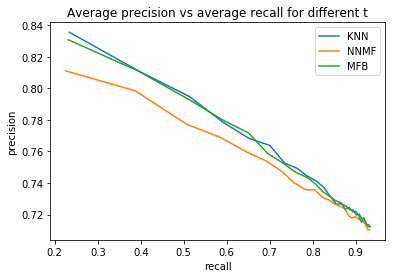

In [132]:
KNN_df = pd.read_csv("/Users/zahra_m/Google Drive/ECE219/repo/ECE219/project3/ver2/dir/knn_result.csv",
                     index_col=0,
                     parse_dates=True)
NNMF_df = pd.read_csv("/Users/zahra_m/Google Drive/ECE219/repo/ECE219/project3/ver2/dir/NMF_result.csv",
                     index_col=0,
                     parse_dates=True)
MFB_df = pd.read_csv("/Users/zahra_m/Google Drive/ECE219/repo/ECE219/project3/ver2/dir/MFB_result.csv",
                     index_col=0,
                     parse_dates=True)

t_range = KNN_df.t.values
KNN_pre = KNN_df.knn_pre.values
KNN_rec = KNN_df.knn_rec.values
NNMF_pre = NNMF_df.NMF_pre.values
NNMF_rec = NNMF_df.NMF_rec.values
MFB_pre = MFB_df.MFB_pre.values
MFB_rec = MFB_df.MFB_rec.values



ax = plt.subplot(111)
plt.title("Average precision vs average recall for different t")
plt.xlabel("recall")
plt.ylabel("precision")
ax.plot(KNN_rec, KNN_pre, label="KNN")
ax.plot(NNMF_rec, NNMF_pre, label="NNMF")
ax.plot(MFB_rec, MFB_pre, label="MFB")
legend = ax.legend()
plt.show()
